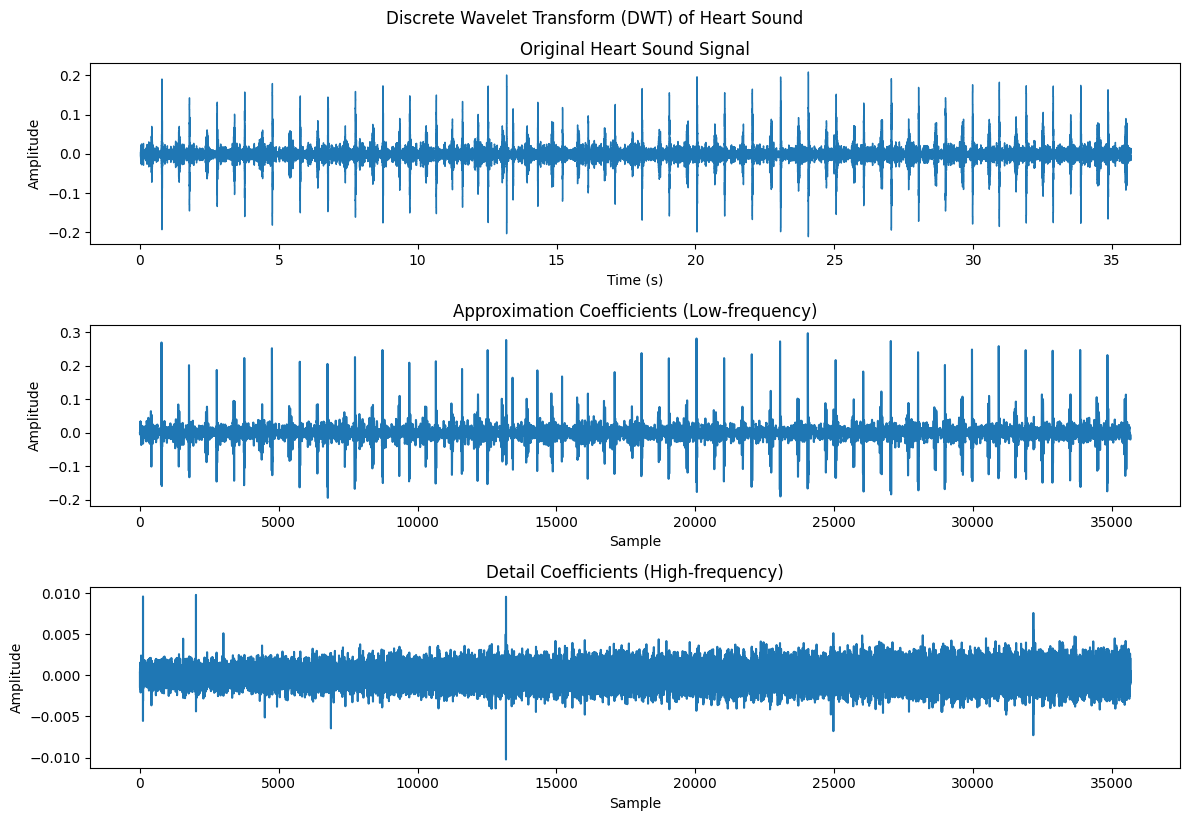

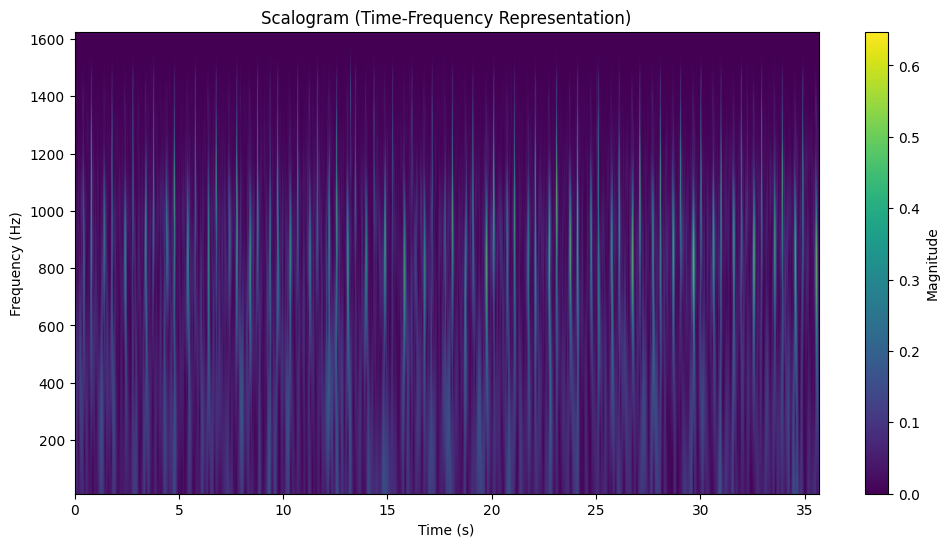

In [ ]:
import librosa
import librosa.display
import pywt
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 오디오 파일 로드 ---
# 분석할 오디오 파일의 경로
# 사용자의 train.py 스크립트와 일관성을 위해 샘플링 레이트를 2000Hz로 설정합니다.
audio_path = '/workspace/training-a/a0001.wav'
y, sr = librosa.load(audio_path, sr=2000)

# --- 2. 이산 웨이블릿 변환 (Discrete Wavelet Transform - DWT) ---
# 'db4' (Daubechies 4) 웨이블릿을 사용하여 1레벨 분해를 수행합니다.
# cA: 근사 계수 (Approximation Coefficients) - 신호의 저주파 성분 (전반적인 형태)
# cD: 상세 계수 (Detail Coefficients) - 신호의 고주파 성분 (빠른 변화, 노이즈)
(cA, cD) = pywt.dwt(y, 'db4')

# --- 3. DWT 결과 시각화 ---
plt.figure(figsize=(12, 8))

# 원본 신호
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Heart Sound Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# 근사 계수 (저주파 성분)
plt.subplot(3, 1, 2)
plt.plot(cA)
plt.title('Approximation Coefficients (Low-frequency)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# 상세 계수 (고주파 성분)
plt.subplot(3, 1, 3)
plt.plot(cD)
plt.title('Detail Coefficients (High-frequency)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.suptitle('Discrete Wavelet Transform (DWT) of Heart Sound', y=1.02)
plt.show()


# --- 4. 연속 웨이블릿 변환 (Continuous Wavelet Transform - CWT) 및 스케일로그램 ---
# CWT는 시간-주파수 분석에 더 적합하며, 결과를 이미지(스케일로그램)로 표현할 수 있습니다.
# CNN 모델의 입력으로 자주 사용됩니다.
wavelet = 'morl'  # Morlet 웨이블릿 사용
scales = np.arange(1, 128) # 분석할 주파수 대역(스케일) 설정

# CWT 수행
coefficients, frequencies = pywt.cwt(y, scales, wavelet, sampling_period=1/sr)

# --- 5. 스케일로그램 시각화 ---
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), extent=[0, len(y)/sr, frequencies[-1], frequencies[0]], 
           cmap='viridis', aspect='auto', vmax=abs(coefficients).max(), vmin=0)
plt.title('Scalogram (Time-Frequency Representation)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.show()
